# Adjacency Matrices and the Page-Rank algorithm

This lab explores the Google Page-Rank Algorithm and it's relation to adjacency matrices. 

## 1. Graphs and Matrices

Below we see a graph, we came across these in FPM, and now they return! This time, we assign directions to our edges, and so this becomes a $\textit{directed}$ graph. We say that the edge $\textit{enters}$ Node A and $\textit{leaves}$ Node B. For simplicity, all graphs in this notebook will have no edges which enter and leave the same node, and no two edges enter and leave the same nodes.

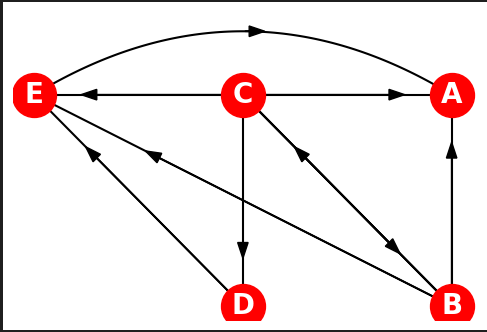

We can write the graph above as a list of tuples representing its edges with the first element being the node the edge is leaving and the second being the one it's entering. For example the edge from $B$ to $A$ in the graph above would be written $(B, A)$. This list of tuples and the list of nodes in a graph are enough to encode all the information of an unweighted graph.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd">Exercise 1.1</h3><span style="color:#fafbfc;background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that takes a list of directed edges represented by pairs (a, b) and a node N and counts the number of nodes with an edge entering n and the number with an edge leaving n. Return this as a tuple.

</div>

In [5]:
def count_in_out_edges(edges, N):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, a specific node N 
    and return a tuple of the number of edges going into and out of N'''
    #your code goes here
    raise NotImplementedError

In [6]:
#small example cases for debugging
g1 = generate_d_graph(3)
g2 = generate_d_graph(2)
assert(count_in_out_edges(g1) == in_out_sol(g1))
assert(count_in_out_edges(g2) == in_out_sol(g2))
#bigger test cases
h1 = generate_d_graph(15)
h2 = generate_d_graph(20)
assert(count_in_out_edges(h1) == in_out_sol(h1))
assert(count_in_out_edges(h2) == in_out_sol(h2))
print("Success! Your function works for the given input.")

NameError: name 'generate_d_graph' is not defined

We can alternatively display the relationships between nodes using a matrix $M$, so when an edge leaves node A and enters node B, we have a 1 in the position $M_{BA}$, NOT in $M_{AB}$. The matrix will be a square $n \times n$ matrix where $n$ is the number of nodes in the graph. When two nodes C and D are not connected, we have a 0 in $M_{CD}$ and $M_{DC}$. This is the adjacency matrix of a directed graph. We can directly construct the adjacency matrix from the list of tuples we used previously.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 1.2</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 2pts)</span>
    
Write a function that takes a list of directed edges represented by pairs (a, b) and returns the matrix associated with that graph.

</div>

In [ ]:
def adjacency_Matrix(edges, n):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, the number of nodes n
     and return the adjacency matrix associated with the graph'''
    #your code goes here
    raise NotImplementedError

In [ ]:
#simple cases with 5 or less vertices
g1 = generate_d_graph(3)
g2 = generate_d_graph(2)
assert(adjacency_Matrix(g1, 3).equals(adjacency_sol(g1, 3)))
assert(adjacency_Matrix(g2, 3).equals(adjacency_sol(g2, 3)))
#larger test cases
h1 = generate_d_graph(15)
h2 = generate_d_graph(20)
assert(adjacency_Matrix(h1, 3).equals(adjacency_sol(h1, 3)))
assert(adjacency_Matrix(h2, 3).equals(adjacency_sol(h2, 3)))
print("Success! Your function works for the given input.")

['B']


ValueError: Sample larger than population or is negative

## 2. Adding Weighting

When we add weight to a graph we add a value to each edge. This can represent many things including imposing a 'cost' on traversing that edge in a road network or the likelihood of randomly choosing an edge when leaving a node. As our graphs are directed, we can only traverse edges in one direction, and this doesn't change when we add weights. The adjacency matric of a weighted graph replaces every $1$ in the unweighted version with the weight of the corresponding edge. We will be exploring Google's Page Rank algorithm (Named after both Larry Page and web pages) which ranks the 'importance' of different webpages. From now on web pages will be our nodes and links between those webpages will be our edges. The weights will be what we use to calculate this importance.

A link from page $A$ to page $B$ can be thought of as a recommendation from page $A$ to page $B$. We want to value recommendations from pages which make very few recommendations so if $A$ makes $t$ total recommendations then we want every recommendation from $A$ to have a weight of $\frac{1}{t}$. This means the adjacency matrix will now be:
\begin{equation*} 
m_{i, j} =
\begin{cases}
0 & \text{no link from $j$ to $i$} \\
\frac{1}{t_j} & \text{otherwise}
\end{cases}
\end{equation*}
Where $t_{j}$ is the total number of links exiting $j$. We can also think of these recommendations probabilistically as a crude estimation of how likely we are to go from page $A$ to page $B$ by randomly selecting one of the links to follow. This will become key.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 2.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 2pts)</span>
    
Write a function that takes a list of directed edges represented by pairs (a, b) and returns the weighted adjacency matrix as we've defined it for the importance of web connections. (Hint: You might save time on a solution by making use of 1.1 and 1.2)

</div>

In [ ]:
def weighting_calc_simple(edges, n):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, the number of nodes n
     and return a list of pairs (a,c) with c being the importance of the node'''
    #your code goes here
    raise NotImplementedError

We can immediately improve this weighting system. Note all recommendations are created equal. We want to prioritize recommendations (links) from important web pages. At first this seems difficult since we now need importance to calculate importance but we can get around with this with some linear algebra. If we take out simple weighting from before and call that adjacency matrix $M$. The importance of all the nodes can be written as a vector $\vec{v}$ with $v_i$ corresponding to the importance of node $i$. We want to multiply each entry in $M$ by these values in other words $Mv$ which will be the importance vector we're looking for. Written in linear algebra:
\begin{equation*}
\vec{v} = M\vec{v}.
\end{equation*}
This means our importance vector should be an eigenvector of the adjacency matrix with eigenvalue $1$. Ideally we want this to be unique up to scaling since this will give us a single well defined ordering, but addressing this will take a little more work.

If you run the code cell below a few times for random graphs what do you notice?

In [ ]:
web = generate_d_graph(15)
M = weighting_calc_simple(web, 15)
pretty_print(M.eigenvectors_right())

NameError: name 'generate_d_graph' is not defined

You should see that $1$ always ends up being an eigenvalue, which is good news and will be discussed directly in the next section. Depending on the graph that gets generated, it may be the case that the dimension of $E(1, M)$ is not $1$, this will also be fixed in a later section.

## 3. Markov Matrices

Markov matrices play a crucial role in various fields, including probability theory and dynamic systems. In this section, we will examine the properties of Markov matrices and develop a function to validate whether a given matrix conforms to the Markov property. Understanding Markov matrices is essential for analysing processes with probabilistic transitions.

Recall that a Markov matrix has non-negative entries and that the sum of entries of each column equal to 1. This tells us something very important about Markov matrices' eigenvalues. Recall the proof of Lemma 4.7.6 from your notes: a Markov matrix always has $\lambda = 1$ as an eigenvalue. Do you think you can come up with a function that tests for this?

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 3.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that takes an $n\times n$ matrix and returns whether or not that matrix is a valid Markov matrix.

</div>

In [ ]:
def validate_Markov(M):
    '''This function takes in a matrix M and returns whether or not it is a Markov Matrix'''
    #your code goes here
    raise NotImplementedError

In [ ]:
#small matrices for easy test cases
assert(validate_Markov(generate_markov(4)))
assert(not(validate_Markov(generate_markov(4) + 0.2*adjacency_sol(generate_d_graph(4)))))
#big bad test cases
assert(validate_Markov(generate_markov(25)))
assert(not(validate_Markov(generate_markov(25)) + 0.03*adjacency_sol(generate_d_graph(25))))
print("Success! Your function works for the given test input.")

We care about Markov matrices because our weighted adjacency matrix is a Markov matrix. Verifying this is simple since along each row there are $t$ entries which are $\frac{1}{t}$ so the sum along any row is:
\begin{equation*}\sum_{i=1}^{t}\frac{1}{t} = \frac{t}{t} = 1.\end{equation*}
This explains why our matrix has always had an eigenvalue of $1$. If you aren't entirely convinced you can run the code cell below after completing exercises $2.1$ and $3.1$ to help verify your solutions and the claimed property.

In [ ]:
for i in range(50):
    for j in range(5, 16):
        graph = generate_d_graph(j)
        assert(validate_Markov(weighting_calc_simple(graph)))
pretty_print("Worked for quite a few tests.")

## 4. Teleportation Matrices

If we again think about our graphs, with each node as a webpage, and each edge as a link between two webpages, we can encounter some issues while trying to traverse this graph. $\textit{Dangling nodes}$ occur when we have a node which only has edges entering it, and none leaving, so we cannot physically leave this node once we enter, these are alternatively known as $\textit{sink nodes}$. An easy example of a webpage like this is any PDF. Our eigenvector is in some sense the eventual result of a random infinite walk around the graph. If we have dangling nodes we will always get stuck in these positions since once we arrive we can never leave. This will lead to all other entries being zeroes and we clearly don't think these non-dangling webpages are completely unimportant so we need to deal with this. In the cell below you can see an example of such a graph and the resulting eigenvector with zeroes for entries.

(2, 1)


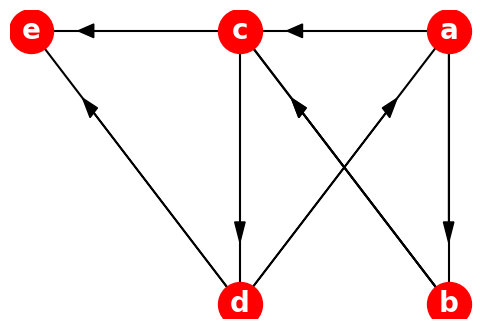

In [5]:
ex_graph_1 = [('a', 'b'), ('b', 'c'), ('a', 'c'), ('b', 'c'), ('d', 'a'), ('c', 'e'), ('d', 'e'), ('c', 'd')]
show_graph(ex_graph_1)
pretty_print(weighting_calc_simple(ex_graph_1).eigenvector_right())

Disconnected components provide a different challenge, if we somehow have a completely independent section of the graph, where all nodes are connected only within this section and no edges leave the group we have disconnected components. These would be, in practice, pages which are only referred to and do not reference any other pages themselves, or internet sections which only reference each other and reference no external pages. In this situation our adjacency matrix will have a mutliple dimension eigenspace each with non-zero entries corresponding to one of the components so we can't properly compare these nodes. Again an example of this is can be seen by running the code cell below.

(3, 0)


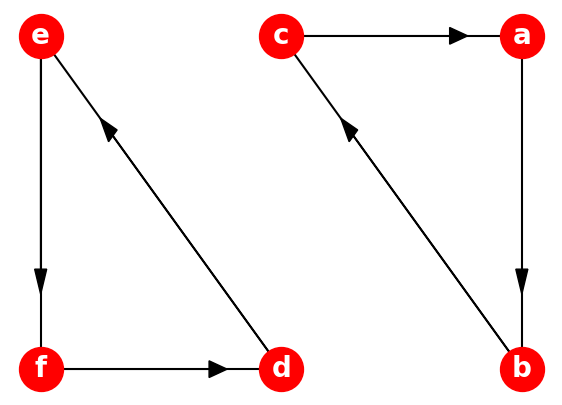

NameError: name 'weighting_calc_simple' is not defined

In [6]:
ex_graph_2 = [('a', 'b'), ('b', 'c'), ('c', 'a'), ('d', 'e'), ('e', 'f'), ('f', 'd')]
show_graph(ex_graph_2)
print(weighting_calc_simple(ex_graph_2).eigenvector_right())

In order to fix both of these these issues, we look to $\textit{teleportation matrices}$, which represent sometimes jumping to a random node, regardless of it's connections. We calculate this matrix by:

$T = \frac{1}{N} \cdot J$,

 where N = number of pages and J is a matrix of all ones.


In order to construct a teleportation matrix, we must introduce a damping factor $d$, as seen above. This is usually between 0.85-0.95. The teleportation matrix can be thought of as sometimes randomly deciding to jump to a new random webpage. This prevents us getting stuck and allows us to move between disconnected components.

We define our new "adjacency" matrix by the formula:
\begin{equation*} G = dM + (1-d)T\end{equation*}.
Crucially, this formula still produces a Markov matrix so we get to keep the nice properties we've developed so far. We can verify this pretty easily since the sum along any row of both matrices is $1$. We then multiply them by $d$ and $1-d$ and add them so the sum across both will be $d + (1-d) = 1$. We have only informally explained why the teleportation matrix fixes our issues, fortunately we have a rigorous mathematical justification as well in the form of the Perron-Frobenius Theorem.

Perron-Frobenius Theorem - If $M \in Mat(n;\mathbb{R})$  is a Markov matrix all of whose entries are positive, then the eigenspace $E(1,M)$ is one dimensional. There exists a unique basis vector $\vec{\text{v}} \in E(1,M)$ all of whose entries are positive real numbers, $v_i > 0$ $\forall i$, and such that the sum of it's entries is 1, $\sum_{i=1}^{n}v_i = 1$.

The reason this theorem now applies is that we have no $0$ entries in $G$ they are instead all strictly positive. This can be easily verified, since we are now guaranteed a single eigenvector associated with the eigenvalue of $1$, which will have all positive values. We finally have our vector of 'importances' and we can rank our webpages according to the entries in the vector. This is the fundamental theory behind why PageRank works.



ex: how to make



I am going to finish this don't steal my work please - lucy

a dangling node

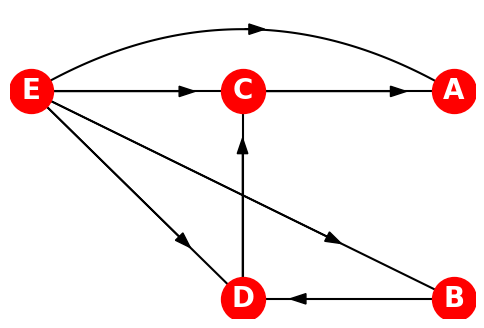

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 3.2</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that returns a teleportation matrix that sends nodes randomly.

</div>

If $\vec{w} \geq 0$, with $|\vec{w}| = 1$, then $\lim_{k \rightarrow \infty} M^{k}\vec{w} = \vec{v}$


Must calculate powers of sparse Markov matrix $Google(\alpha)$ - close to M - so we can approximate eigenvector $\vec{v}$

## 5. PageRank Algorithm

section 5: page rank
use sage get evec to do page rank
ex: get rank of nodes

I am going to finish this don't steal my work please - lucy

In [2]:
from random import sample
from random import randint
def generate_d_graph(n):
    if n > 26:
        raise ValueError("n must be less than or equal to 26")
    graph = []
    nodes = [chr(65+i) for i in range(n)]
    for node in nodes:
        nodes_copy = nodes.copy()
        nodes_copy.remove(node)
        graph += [(node, i) for i in sample(nodes_copy, randint(0,1))]
    connected_nodes = [i[0] for i in graph] + [i[1] for i in graph]
    unconnected_nodes = [i for i in nodes if i not in connected_nodes]

    print(unconnected_nodes)
    
    for node in unconnected_nodes:
        nodes_copy = nodes.copy()
        nodes_copy.remove(node)
        graph += [(node, i) for i in sample(nodes_copy, randint(1,4))]
    
    return graph

In [ ]:
def markov_sol(M):
    return (([1] * len(M.rows())).equals([sum(row) for row in M]) and all([sum(row) == 1 for row in M.rows()]))

In [ ]:
def adjacency_sol(edges, n):
    matrix_list = [[0]*n]
    for edge in edges:
        matrix_list[edge[1], edge[0]] = 1
    return Matrix(matrix_list)

In [1]:
def in_out_sol(edges, g):
    return (sum([1 if edge[1] == g else 0 for edge in edges]), sum([1 if edge[0] == g else 0 for edge in edges]))

In [ ]:
from random import uniform
def generate_Markov(n):
    matrix_list = [[uniform(0, 0.1 / n) for i in range(k)] for j in range(n)]
    for j, r in enumerate(matrix_list):
        r[j] += 1 - sum(r)
    return Matrix(matrix_list)

['B', 'E']
(2, 1)


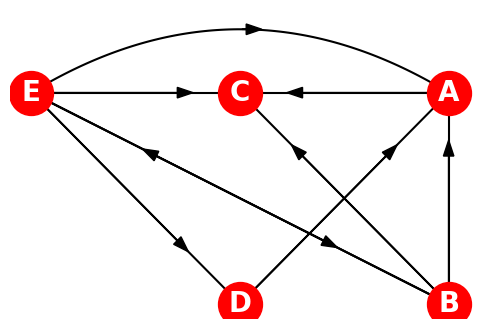

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def show_graph(graph):
    nodes = sorted(set([i[0] for i in graph] + [i[1] for i in graph]))
    n = len(nodes)
    node_points = {node:(0-(i//int((n)**0.5)), 0-(i%int((n)**0.5))) for i,node in enumerate(nodes)}

    print(((n//int((n)**0.5)),(n%int((n)**0.5))))
    fig, ax = plt.subplots(figsize=((n//int((n)**0.5))+4,((n-1)%int((n)**0.5))+4))

    for node,xy in node_points.items():
        ax.scatter(xy[0], xy[1], s=1000, color="red", zorder=1)
        for connected_node in [i[1] for i in graph if node == i[0]]:
            c_node_xy = node_points[connected_node]
            d_x = (c_node_xy[0]-xy[0])
            d_y = (c_node_xy[1]-xy[1])
            sign = 1
            if d_x == 0 and abs(d_y)>1:
                if xy[0] == 0 or xy[0]==(n-1):
                    sign = -1
                y_vals = np.linspace(xy[1], c_node_xy[1], 100)
                x_func = lambda y : sign*(0.3)*(y-c_node_xy[1])*(y-xy[1]) + xy[0]
                ax.plot(x_func(y_vals), y_vals, zorder=0, color="black")
                ax.arrow(x_func(y_vals[50]), y_vals[50], 0.01*d_x, 0.01*d_y, zorder=0, color="black", head_width=0.05)
            elif d_y == 0 and abs(d_x)>1:
                if xy[1] == 0 or xy[1]==(n-1):
                    sign = -1
                x_vals = np.linspace(xy[0], c_node_xy[0], 100)
                y_func = lambda x : sign*(0.3)*(x-c_node_xy[0])*(x-xy[0]) + xy[1]
                ax.plot(x_vals, y_func(x_vals), zorder=0, color="black")
                ax.arrow(x_vals[50], y_func(x_vals[50]), 0.01*d_x, 0.01*d_y, zorder=0, color="black", head_width=0.05)
            else:
                ax.plot([xy[0], c_node_xy[0]], [xy[1], c_node_xy[1]], zorder=0, color="black")
                ax.arrow(xy[0], xy[1], d_x*0.7, d_y*0.7, zorder=0, color="black", head_width=0.05)
        ax.annotate(node, xy, ha='center', va='center', weight='bold', color="white", fontsize=20)

    ax.axis('off')

    plt.show()

show_graph(generate_d_graph(5))